# KNN Model Training for Emotion Detection through Facial Recognition
This is the training module for detecting Emotions through Facial Recognition using K-Nearest Neighbors Algorithm.
It uses the generated dataset **model_training.csv** that was generated from the data processing module.


## Libraries

First, we have to import the necessary libraries.

In [1]:
#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Importing and Splitting the datasets

In [2]:
#importing the datasets
train_set = pd.read_csv('./outputs/train_set_augmented_simplified.csv')
test_set = pd.read_csv('./outputs/test_set_augmented_simplified.csv')

In [3]:
#Split into features and target; x = features, y = target
x_train = train_set.iloc[:, 1:]
y_train = train_set['label']

x_test = test_set.iloc[:, 1:]
y_test = test_set['label']

#combining test and train set for cross validation
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

## Training the model

We then train the KNN model using the training dataset with the number of neighbors as 3.

In [4]:
#Training the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Testing the model

After training, we can then test and evaluate the model through cross validation and using the test set

In [5]:
y_cross_scores = cross_val_score(knn, x, y, cv=5, scoring = 'accuracy')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (y_cross_scores.mean()*100, y_cross_scores.std()*100))

65.92% accuracy with a standard deviation of 0.82%


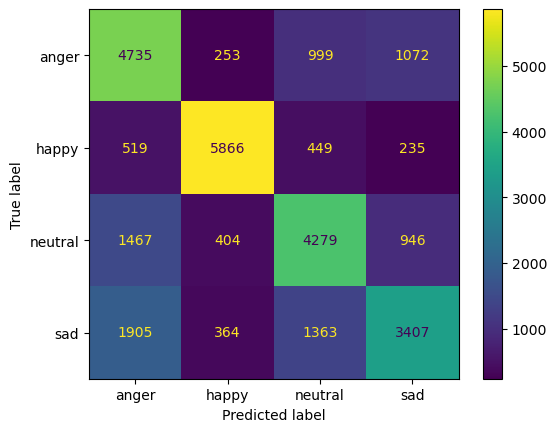

In [6]:
y_cross_predict = cross_val_predict(knn, x_train, y_train, cv = 5) 
y_cross_cm = confusion_matrix(y_train, y_cross_predict)
y_cross_display = ConfusionMatrixDisplay(confusion_matrix=y_cross_cm, display_labels=knn.classes_)
y_cross_display.plot()

In [7]:
y_pred = knn.predict(x_test)

In [8]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(knn.score(x_test, y_test) * 100))


The mean accuracy of the given test data and labels is: 65.43%


In [9]:
y_pred_accuracy = accuracy_score(y_test, y_pred)
y_pred_precision = precision_score(y_test, y_pred, average='macro')
y_pred_recall = recall_score(y_test, y_pred, average='macro')
y_pred_f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", y_pred_accuracy*100)
print("Precision: ", y_pred_precision*100)
print("Recall: ", y_pred_recall*100)
print("F1: ", y_pred_f1*100)


Accuracy:  65.42889573536566
Precision:  64.5846239678096
Recall:  64.1444223674193
F1:  64.1388998468713


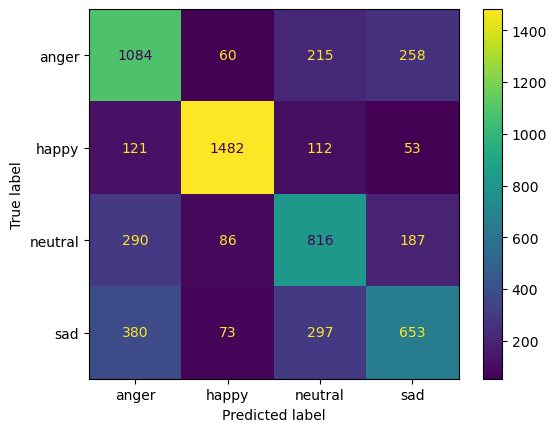

In [10]:
y_pred_cm = confusion_matrix(y_test, y_pred)
y_pred_display = ConfusionMatrixDisplay(confusion_matrix=y_pred_cm, display_labels=knn.classes_)
y_pred_display.plot()

# Hyperparameter Tuning

In [11]:
f1_train = list()
accuracy_train = list()
precision_train = list()
recall_train = list()
f1_test = list()
accuracy_test = list()
precision_test = list()
recall_test = list()

def knn_model(x_train, y_train, x_test, y_test, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)

    y_cross_val = cross_val_predict(knn, x_train, y_train, cv=5)
    accuracy_train.append(accuracy_score(y_train, y_cross_val))
    precision_train.append(precision_score(y_train, y_cross_val, average='macro'))
    recall_train.append(recall_score(y_train, y_cross_val, average='macro'))
    f1_train.append(f1_score(y_train, y_cross_val, average='macro'))

    y_pred = knn.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred, average='macro'))
    recall_test.append(recall_score(y_test, y_pred, average='macro'))
    f1_test.append(f1_score(y_test, y_pred, average='macro'))



x = range(1, 21)

for i in x:
    knn_model(x_train, y_train, x_test, y_test, i)



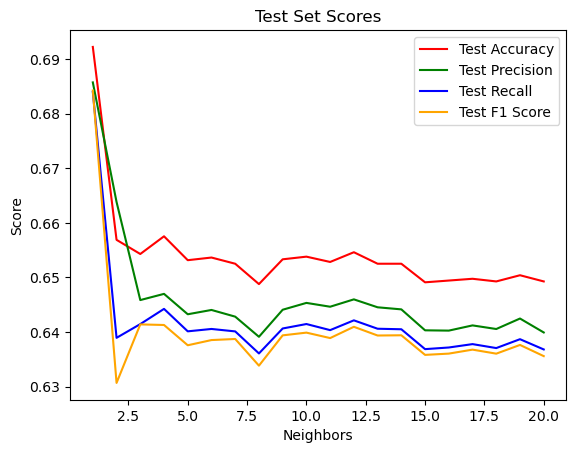

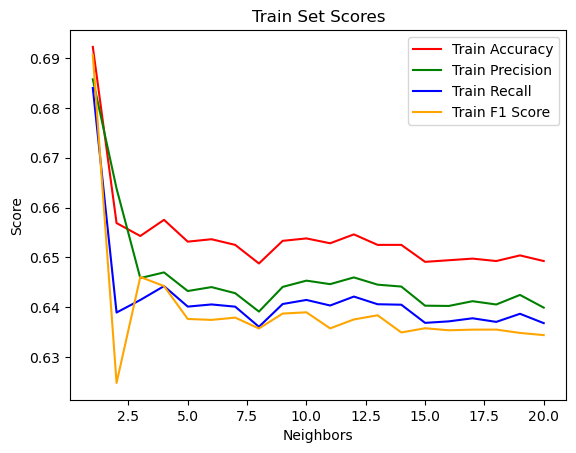

In [12]:
#plotting the accuracy, precision, recall and f1 score of test set
plt.plot(x, accuracy_test, label = 'Test Accuracy', color = 'red')
plt.plot(x, precision_test, label = 'Test Precision', color = 'green')
plt.plot(x, recall_test, label = 'Test Recall', color = 'blue')
plt.plot(x, f1_test, label = 'Test F1 Score', color = 'orange') 

plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('Test Set Scores')
plt.legend()
plt.savefig('knn_test_scores_augmented.png', dpi=300, bbox_inches='tight')
plt.show()

#plotting the accuracy, precision, recall and f1 score of train set

plt.plot(x, accuracy_test, label = 'Train Accuracy', color = 'red')
plt.plot(x, precision_test, label = 'Train Precision', color = 'green')
plt.plot(x, recall_test, label = 'Train Recall', color = 'blue')
plt.plot(x, f1_train, label = 'Train F1 Score', color = 'orange')

plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('Train Set Scores')
plt.legend()
plt.savefig('knn_train_scores_augmented.png', dpi=300, bbox_inches='tight')
plt.show()

# Performance Metrics Summary

In [13]:
highest_f1_index = np.argmax(f1_test)
print("The highest F1 score is: ", f1_test[highest_f1_index] * 100, "% with ", highest_f1_index+1, " neighbors")

highest_accuracy_index = np.argmax(accuracy_test)
print("The highest accuracy score is: ", accuracy_test[highest_accuracy_index] * 100, "% with ", highest_accuracy_index+1, " neighbors")

highest_precision_index = np.argmax(precision_test)
print("The highest precision score is: ", precision_test[highest_precision_index]*100, "% with ", highest_precision_index+1, " neighbors")

highest_recall_index = np.argmax(recall_test)
print("The highest recall score is: ", recall_test[highest_recall_index]*100, "% with ", highest_recall_index+1, " neighbors")

The highest F1 score is:  68.42484878397417 % with  1  neighbors
The highest accuracy score is:  69.22328522782553 % with  1  neighbors
The highest precision score is:  68.57314862750079 % with  1  neighbors
The highest recall score is:  68.39860437339365 % with  1  neighbors


In [14]:
tuned_knn = KNeighborsClassifier(n_neighbors=highest_f1_index+1)
tuned_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
tuned_y_cross_val = cross_val_predict(tuned_knn, x_train, y_train, cv=5)
print("Accuracy: ", accuracy_score(y_train, tuned_y_cross_val)*100)
print("Precision: ", precision_score(y_train, tuned_y_cross_val, average='macro')*100)
print("Recall: ", recall_score(y_train, tuned_y_cross_val, average='macro')*100)
print("F1: ", f1_score(y_train, tuned_y_cross_val, average='macro')*100)

Accuracy:  68.97710787955985
Precision:  69.27474102127526
Recall:  68.96713574709355
F1:  69.06240999975101


# Exporting Best Model

In [17]:
from joblib import dump

dump(tuned_knn, './KNN_results/knn_n-1_simplified.joblib')

['./KNN_results/knn_n-1_simplified.joblib']